## Data Exploration !

Using the existing 3 datasets (Customer demographic, customer address and transactions) as a labelled dataset, please recommend which of these 1000 new customers should be targeted to drive the most value for the organisation. 


<br>
Prepare a detailed approach for completing the analysis including activities 

<li>understanding the data distributions</li>
<li>feature engineering,</li>
<li>data transformation</li>
<li>modelling</li>
<li>results interpretation</li>
<li>reporting</li>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import date

In [2]:
customerDemographic = pd.read_csv('customerDemographic.csv')
customerAddress = pd.read_csv('customerAddress.csv')
transactions = pd.read_csv('transactions_cleaned.csv')

### Understanding Data Distributions 

#### Customer Demographic

In [3]:
customerDemographic.drop(['default', 'Unnamed: 0'], axis=1, inplace=True)

In [4]:
sum(customerDemographic.gender.isna())

0

In [5]:
customerDemographic.gender.value_counts()

Female    1365
Male      1259
Femal        1
F            1
Name: gender, dtype: int64

In [6]:
mapping = {'Femal' : 'Female',
          'F' :'Female',
          'Female':'Female',
          'Male' : 'Male'}

In [7]:
customerDemographic.gender.map(mapping)

0       Female
1         Male
2         Male
3       Female
4       Female
         ...  
2621    Female
2622    Female
2623      Male
2624    Female
2625    Female
Name: gender, Length: 2626, dtype: object

In [8]:
customerDemographic.gender = customerDemographic.gender.map(mapping)

In [9]:
customerDemographic.gender.value_counts()

Female    1367
Male      1259
Name: gender, dtype: int64

In [10]:
customerDemographic.past_3_years_bike_related_purchases.describe()

count    2626.000000
mean       49.367098
std        28.857127
min         0.000000
25%        25.000000
50%        48.500000
75%        74.000000
max        99.000000
Name: past_3_years_bike_related_purchases, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcee070f890>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcedfe18790>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcedfe0b050>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcedfe1f210>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcedfe1f710>],
 'means': []}

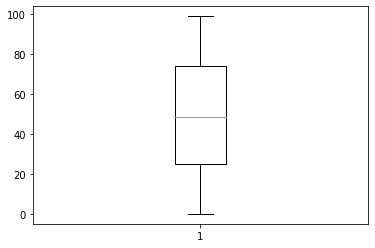

In [11]:
plt.boxplot(customerDemographic.past_3_years_bike_related_purchases)

In [12]:
customerDemographic.DOB.value_counts()

1978-01-30    6
1976-07-16    4
1980-09-10    3
1978-01-23    3
1976-09-25    3
             ..
1986-02-20    1
1966-04-03    1
1963-05-15    1
1967-12-03    1
1990-02-19    1
Name: DOB, Length: 2409, dtype: int64

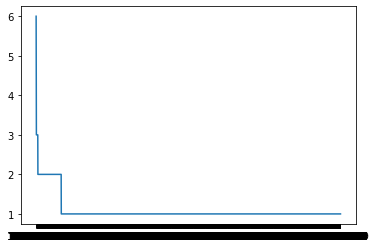

In [13]:
plt.plot(customerDemographic.DOB.value_counts())


/home/jasp/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


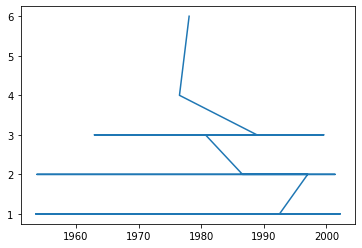

In [14]:
plt.plot(pd.to_datetime(customerDemographic.DOB).value_counts())

In [15]:
pd.datetime.now() - pd.to_datetime(customerDemographic.DOB)

0      24364 days 16:08:06.587595
1      14437 days 16:08:06.587595
2      24264 days 16:08:06.587595
3      17275 days 16:08:06.587595
4      11581 days 16:08:06.587595
                  ...            
2621   16640 days 16:08:06.587595
2622   11403 days 16:08:06.587595
2623   16268 days 16:08:06.587595
2624   16393 days 16:08:06.587595
2625    6923 days 16:08:06.587595
Name: DOB, Length: 2626, dtype: timedelta64[ns]

In [16]:
pd.datetime.now().date()

datetime.date(2020, 6, 26)

In [17]:
def calculate_age(born):
    born = datetime.strptime(born, "%Y-%m-%d").date()
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))


customerDemographic['age'] = customerDemographic['DOB'].apply(calculate_age)

In [18]:
customerDemographic.age

0       66
1       39
2       66
3       47
4       31
        ..
2621    45
2622    31
2623    44
2624    44
2625    18
Name: age, Length: 2626, dtype: int64

In [19]:
customerDemographic.dtypes

customer_id                              int64
first_name                              object
last_name                               object
gender                                  object
past_3_years_bike_related_purchases      int64
DOB                                     object
job_title                               object
job_industry_category                   object
wealth_segment                          object
deceased_indicator                      object
owns_car                                object
tenure                                 float64
age                                      int64
dtype: object

(array([183., 237., 226., 231., 295., 566., 240., 243., 219., 186.]),
 array([18. , 22.8, 27.6, 32.4, 37.2, 42. , 46.8, 51.6, 56.4, 61.2, 66. ]),
 <a list of 10 Patch objects>)

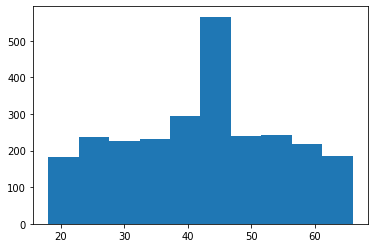

In [20]:
plt.hist(customerDemographic.age)

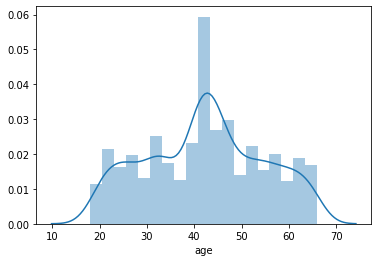

In [21]:
sns.distplot(customerDemographic.age)

In [22]:
customerDemographic.age

0       66
1       39
2       66
3       47
4       31
        ..
2621    45
2622    31
2623    44
2624    44
2625    18
Name: age, Length: 2626, dtype: int64

In [23]:
customerDemographic.age.describe()

count    2626.000000
mean       42.186215
std        12.413540
min        18.000000
25%        33.000000
50%        42.000000
75%        51.000000
max        66.000000
Name: age, dtype: float64

(array([383., 400., 362., 366., 282., 303., 214., 112., 123.,  81.]),
 array([  0. ,  19.4,  38.8,  58.2,  77.6,  97. , 116.4, 135.8, 155.2,
        174.6, 194. ]),
 <a list of 10 Patch objects>)

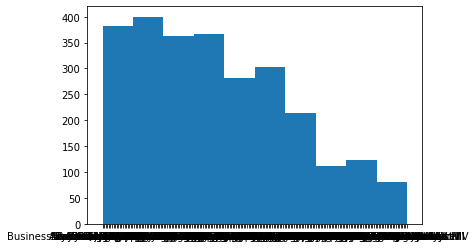

In [24]:
#sns.catplot(x="job_title", kind="hist", data=customerDemographic)

plt.hist(customerDemographic.job_title)

(array([45., 53., 12.,  3., 23., 21., 11., 15., 10.,  2.]),
 array([ 1. ,  4.7,  8.4, 12.1, 15.8, 19.5, 23.2, 26.9, 30.6, 34.3, 38. ]),
 <a list of 10 Patch objects>)

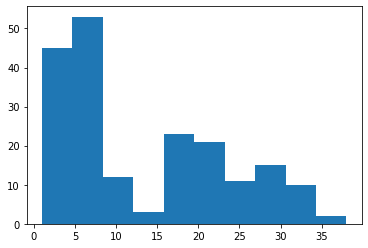

In [25]:
plt.hist(customerDemographic.job_title.value_counts())


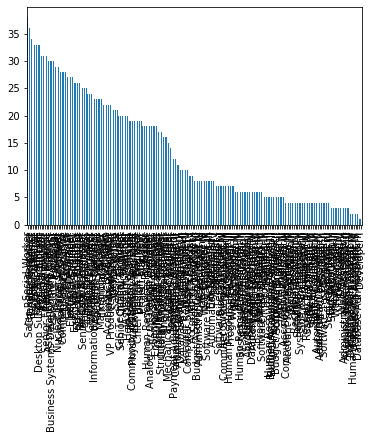

In [26]:
customerDemographic.job_title.value_counts().plot.bar()

In [27]:
pd.set_option('display.max_rows', 999)

In [28]:
customerDemographic.job_title.value_counts()

Social Worker                           38
Sales Representative                    36
Chemical Engineer                       34
Dental Hygienist                        34
Food Chemist                            33
Registered Nurse                        33
Cost Accountant                         33
Desktop Support Technician              33
Tax Accountant                          31
Internal Auditor                        31
Legal Assistant                         31
Senior Financial Analyst                31
Research Nurse                          30
Assistant Media Planner                 30
Business Systems Development Analyst    30
Associate Professor                     30
Paralegal                               29
Librarian                               29
Nuclear Power Engineer                  29
Clinical Specialist                     28
Administrative Officer                  28
Compensation Analyst                    28
Junior Executive                        28
Pharmacist 

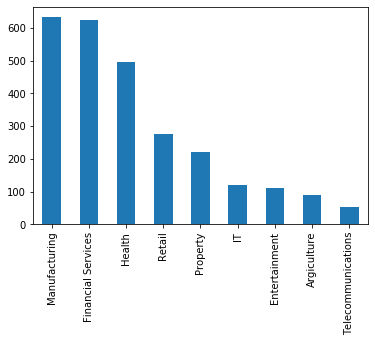

In [29]:
customerDemographic.job_industry_category.value_counts().plot.bar()

In [30]:
customerDemographic.job_industry_category.value_counts()

Manufacturing         633
Financial Services    626
Health                496
Retail                276
Property              222
IT                    119
Entertainment         110
Argiculture            91
Telecommunications     53
Name: job_industry_category, dtype: int64

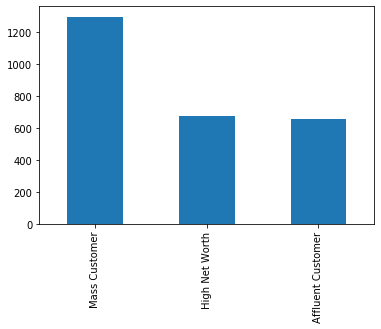

In [31]:
customerDemographic.wealth_segment.value_counts().plot.bar()

In [32]:
customerDemographic.wealth_segment.value_counts()

Mass Customer        1299
High Net Worth        673
Affluent Customer     654
Name: wealth_segment, dtype: int64

In [33]:
customerDemographic.deceased_indicator.value_counts()

N    2624
Y       2
Name: deceased_indicator, dtype: int64

In [34]:
customerDemographic.owns_car.value_counts()

Yes    1359
No     1267
Name: owns_car, dtype: int64

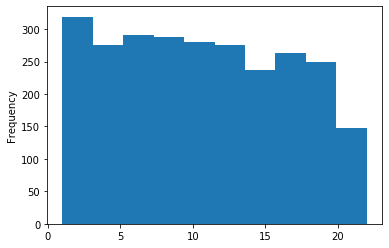

In [35]:
customerDemographic.tenure.plot.hist()

In [36]:
customerDemographic.tenure.describe()

count    2626.000000
mean       10.674029
std         5.677792
min         1.000000
25%         6.000000
50%        10.000000
75%        16.000000
max        22.000000
Name: tenure, dtype: float64

In [37]:
customerDemographic.age

0       66
1       39
2       66
3       47
4       31
        ..
2621    45
2622    31
2623    44
2624    44
2625    18
Name: age, Length: 2626, dtype: int64

## customerAddress

In [38]:
customerAddress.dtypes

Unnamed: 0             int64
customer_id            int64
address               object
postcode               int64
state                 object
country               object
property_valuation     int64
dtype: object

In [39]:
customerAddress.drop(['Unnamed: 0'], axis=1, inplace=True)

In [40]:
customerAddress.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,NSW,Australia,10
1,2,6 Meadow Vale Court,2153,NSW,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,NSW,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [41]:
customerAddress.country.value_counts()

Australia    3999
Name: country, dtype: int64

In [42]:
sum(customerAddress.state.isna())

0

In [43]:
customerAddress.state.value_counts()

NSW    2140
VIC    1021
QLD     838
Name: state, dtype: int64

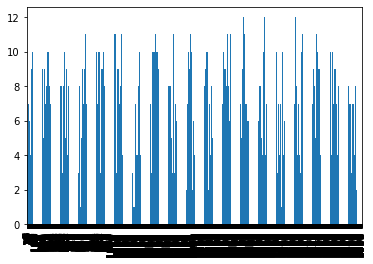

In [44]:
customerAddress.property_valuation.plot.bar()

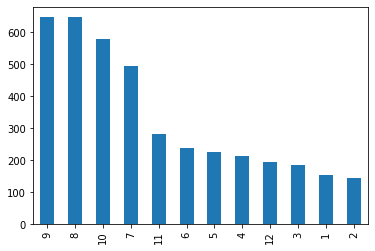

In [45]:
customerAddress.property_valuation.value_counts().plot.bar()

In [46]:
customerAddress.property_valuation.describe()

count    3999.000000
mean        7.514379
std         2.824663
min         1.000000
25%         6.000000
50%         8.000000
75%        10.000000
max        12.000000
Name: property_valuation, dtype: float64

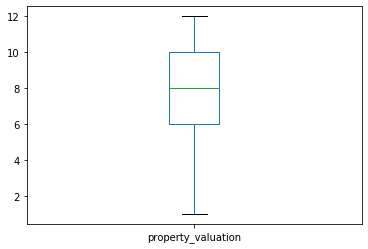

In [47]:
customerAddress.property_valuation.plot.box()

### transactions

In [48]:
transactions.head()

,Unnamed: 0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,0113-12-04 00:00:00
1,1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,0115-03-05 00:00:00
2,2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,0100-07-21 00:00:00
3,3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,0099-12-17 00:00:00
4,4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,0116-08-11 00:00:00


In [49]:
transactions.drop(['Unnamed: 0'], axis=1)


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,0113-12-04 00:00:00
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,0115-03-05 00:00:00
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,0100-07-21 00:00:00
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,0099-12-17 00:00:00
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,0116-08-11 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19440,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,0104-07-22 00:00:00
19441,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,0098-05-11 00:00:00
19442,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,0111-08-22 00:00:00
19443,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,0105-08-19 00:00:00


In [50]:
transactions.dtypes

Unnamed: 0                   int64
transaction_id               int64
product_id                   int64
customer_id                  int64
transaction_date            object
online_order               float64
order_status                object
brand                       object
product_line                object
product_class               object
product_size                object
list_price                 float64
standard_cost              float64
product_first_sold_date     object
dtype: object

In [51]:
transactions.shape

(19445, 14)

In [52]:
transactions.customer_id.value_counts()

2476    14
1068    14
2183    14
1302    13
1913    13
        ..
2271     1
2532     1
1544     1
373      1
2047     1
Name: customer_id, Length: 3492, dtype: int64

(array([ 268.,  404.,  530., 1175.,  442.,  291.,  289.,   59.,   20.,
          14.]),
 array([ 1. ,  2.3,  3.6,  4.9,  6.2,  7.5,  8.8, 10.1, 11.4, 12.7, 14. ]),
 <a list of 10 Patch objects>)

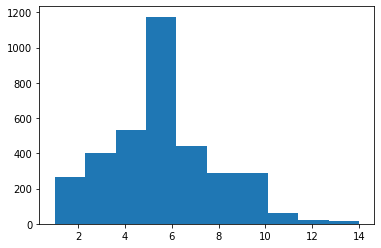

In [53]:
plt.hist(transactions.customer_id.value_counts())

In [54]:
transactions.customer_id.value_counts().describe()

count    3492.000000
mean        5.568442
std         2.291344
min         1.000000
25%         4.000000
50%         5.000000
75%         7.000000
max        14.000000
Name: customer_id, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7fced302f250>,
 'caps': [<matplotlib.lines.Line2D at 0x7fced3011dd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fced3011d90>],
 'medians': [<matplotlib.lines.Line2D at 0x7fced300cf50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fced3014f10>],
 'means': []}

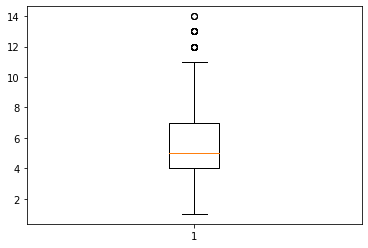

In [55]:
plt.boxplot(transactions.customer_id.value_counts())

In [56]:
transactions.transaction_date.describe()

count          19445
unique           364
top       2017-02-14
freq              81
Name: transaction_date, dtype: object

In [57]:
import datetime as dt

In [58]:
transactions['transaction_date']= pd.to_datetime(transactions['transaction_date']) 

In [59]:
transactions.transaction_date

0       2017-02-25
1       2017-05-21
2       2017-10-16
3       2017-08-31
4       2017-10-01
           ...    
19440   2017-06-24
19441   2017-11-09
19442   2017-04-14
19443   2017-07-03
19444   2017-09-22
Name: transaction_date, Length: 19445, dtype: datetime64[ns]

In [60]:
transactions['transaction_date'].dt.year

0        2017
1        2017
2        2017
3        2017
4        2017
         ... 
19440    2017
19441    2017
19442    2017
19443    2017
19444    2017
Name: transaction_date, Length: 19445, dtype: int64

(array([    0.,     0.,     0.,     0.,     0., 19445.,     0.,     0.,
            0.,     0.]),
 array([2016.5, 2016.6, 2016.7, 2016.8, 2016.9, 2017. , 2017.1, 2017.2,
        2017.3, 2017.4, 2017.5]),
 <a list of 10 Patch objects>)

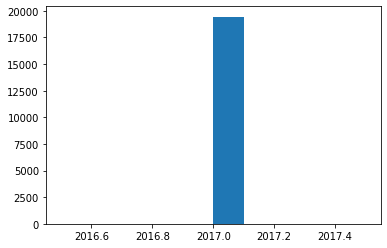

In [61]:
plt.hist(transactions['transaction_date'].dt.year)

In [62]:
transactions['transaction_date'].dt.year.value_counts()

2017    19445
Name: transaction_date, dtype: int64

In [63]:
transactions['transaction_date'].dt.month.value_counts()

10    1723
8     1703
7     1670
5     1641
1     1634
4     1613
12    1608
11    1607
3     1597
2     1578
6     1537
9     1534
Name: transaction_date, dtype: int64

In [64]:
transactions['transaction_date'].dt.month.value_counts()

10    1723
8     1703
7     1670
5     1641
1     1634
4     1613
12    1608
11    1607
3     1597
2     1578
6     1537
9     1534
Name: transaction_date, dtype: int64

<BarContainer object of 12 artists>

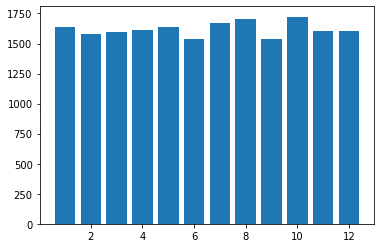

In [65]:
plt.bar(transactions['transaction_date'].dt.month.value_counts().index , 
       transactions['transaction_date'].dt.month.value_counts().values)

In [66]:
transactions.online_order.value_counts()

1.0    9739
0.0    9706
Name: online_order, dtype: int64

In [67]:
transactions.order_status.value_counts()

Approved     19273
Cancelled      172
Name: order_status, dtype: int64

In [68]:
transactions.brand.value_counts()

Solex             4169
WeareA2B          3245
Giant Bicycles    3244
OHM Cycles        2993
Trek Bicycles     2931
Norco Bicycles    2863
Name: brand, dtype: int64

([0, 1, 2, 3, 4, 5], <a list of 6 Text xticklabel objects>)

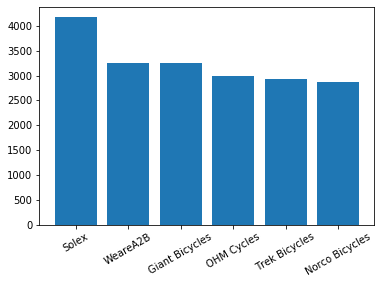

In [69]:
plt.bar(transactions.brand.value_counts().index, 
       transactions.brand.value_counts().values)
plt.xticks(rotation=30)

In [70]:
transactions.product_line.value_counts()

Standard    13920
Road         3894
Touring      1213
Mountain      418
Name: product_line, dtype: int64

In [71]:
transactions.product_class.value_counts()

medium    13587
high       2952
low        2906
Name: product_class, dtype: int64

In [72]:
transactions.product_size.value_counts()

medium    12767
large      3900
small      2778
Name: product_size, dtype: int64

In [73]:
transactions.list_price.describe()

count    19445.000000
mean      1107.337193
std        582.662400
min         12.010000
25%        575.270000
50%       1163.890000
75%       1635.300000
max       2091.470000
Name: list_price, dtype: float64

(array([1470., 1475., 2316., 1705., 1107., 3235., 2274., 1544., 2463.,
        1856.]),
 array([  12.01 ,  219.956,  427.902,  635.848,  843.794, 1051.74 ,
        1259.686, 1467.632, 1675.578, 1883.524, 2091.47 ]),
 <a list of 10 Patch objects>)

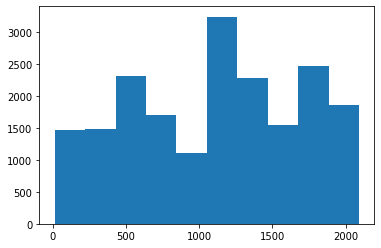

In [74]:
plt.hist(transactions.list_price)

In [75]:
transactions.standard_cost.describe()

count    19445.000000
mean       555.585260
std        405.596541
min          7.210000
25%        215.140000
50%        507.580000
75%        795.100000
max       1759.850000
Name: standard_cost, dtype: float64

In [76]:
type(transactions.standard_cost)

pandas.core.series.Series

In [77]:
transactions.standard_cost.sort_values()

14544       7.21
6170        7.21
17727       7.21
6208        7.21
15870       7.21
          ...   
1334     1759.85
2175     1759.85
6185     1759.85
17762    1759.85
14773    1759.85
Name: standard_cost, Length: 19445, dtype: float64

(array([4176., 2748., 3728., 2582., 2818., 1161.,  747.,  389.,  711.,
         385.]),
 array([   7.21 ,  182.474,  357.738,  533.002,  708.266,  883.53 ,
        1058.794, 1234.058, 1409.322, 1584.586, 1759.85 ]),
 <a list of 10 Patch objects>)

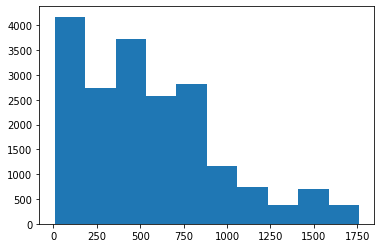

In [78]:
plt.hist(transactions.standard_cost)

In [79]:
transactions.product_first_sold_date

0        0113-12-04 00:00:00
1        0115-03-05 00:00:00
2        0100-07-21 00:00:00
3        0099-12-17 00:00:00
4        0116-08-11 00:00:00
                ...         
19440    0104-07-22 00:00:00
19441    0098-05-11 00:00:00
19442    0111-08-22 00:00:00
19443    0105-08-19 00:00:00
19444    0100-06-24 00:00:00
Name: product_first_sold_date, Length: 19445, dtype: object

In [80]:
transactions.dtypes

Unnamed: 0                          int64
transaction_id                      int64
product_id                          int64
customer_id                         int64
transaction_date           datetime64[ns]
online_order                      float64
order_status                       object
brand                              object
product_line                       object
product_class                      object
product_size                       object
list_price                        float64
standard_cost                     float64
product_first_sold_date            object
dtype: object

In [81]:
transactions.shape

(19445, 14)

In [82]:
customerAddress.dtypes

customer_id            int64
address               object
postcode               int64
state                 object
country               object
property_valuation     int64
dtype: object

In [83]:
customerAddress.shape

(3999, 6)

In [84]:
customerDemographic.dtypes

customer_id                              int64
first_name                              object
last_name                               object
gender                                  object
past_3_years_bike_related_purchases      int64
DOB                                     object
job_title                               object
job_industry_category                   object
wealth_segment                          object
deceased_indicator                      object
owns_car                                object
tenure                                 float64
age                                      int64
dtype: object

In [85]:
customerDemographic.shape

(2626, 13)

In [86]:
# merging Address and Demographic tables 
merged_customer_new = pd.merge(left=transactions, right=customerDemographic, left_on='customer_id', right_on='customer_id')

In [87]:
merged_customer_new.shape

(12955, 26)

In [88]:
merged_customer_new.dtypes


Unnamed: 0                                      int64
transaction_id                                  int64
product_id                                      int64
customer_id                                     int64
transaction_date                       datetime64[ns]
online_order                                  float64
order_status                                   object
brand                                          object
product_line                                   object
product_class                                  object
product_size                                   object
list_price                                    float64
standard_cost                                 float64
product_first_sold_date                        object
first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                         

In [89]:
# merging Address and Demographic tables 
merged_customer_full = pd.merge(left=merged_customer_new, right=customerAddress, left_on='customer_id', right_on='customer_id')

In [90]:
merged_customer_full.shape

(12943, 31)

In [91]:
merged_customer_full.dtypes

Unnamed: 0                                      int64
transaction_id                                  int64
product_id                                      int64
customer_id                                     int64
transaction_date                       datetime64[ns]
online_order                                  float64
order_status                                   object
brand                                          object
product_line                                   object
product_class                                  object
product_size                                   object
list_price                                    float64
standard_cost                                 float64
product_first_sold_date                        object
first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                         

In [96]:
merged_customer_full.drop(['Unnamed: 0'], axis=1, inplace=True)

In [97]:
merged_customer_full.to_csv('merged_data.csv')

In [93]:
merged_customer_full.dtypes

Unnamed: 0                                      int64
transaction_id                                  int64
product_id                                      int64
customer_id                                     int64
transaction_date                       datetime64[ns]
online_order                                  float64
order_status                                   object
brand                                          object
product_line                                   object
product_class                                  object
product_size                                   object
list_price                                    float64
standard_cost                                 float64
product_first_sold_date                        object
first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                         

In [95]:
merged_customer_full.dtypes

Unnamed: 0                                      int64
transaction_id                                  int64
product_id                                      int64
customer_id                                     int64
transaction_date                       datetime64[ns]
online_order                                  float64
order_status                                   object
brand                                          object
product_line                                   object
product_class                                  object
product_size                                   object
list_price                                    float64
standard_cost                                 float64
product_first_sold_date                        object
first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                         